# This notebook is about

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline, make_pipeline

sns.set_style('darkgrid')

In [66]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [67]:
X = california_housing.data
y = california_housing.target

df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = y
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

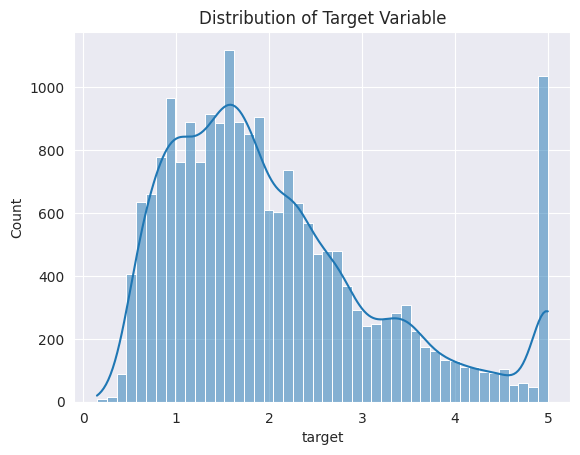

In [4]:
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

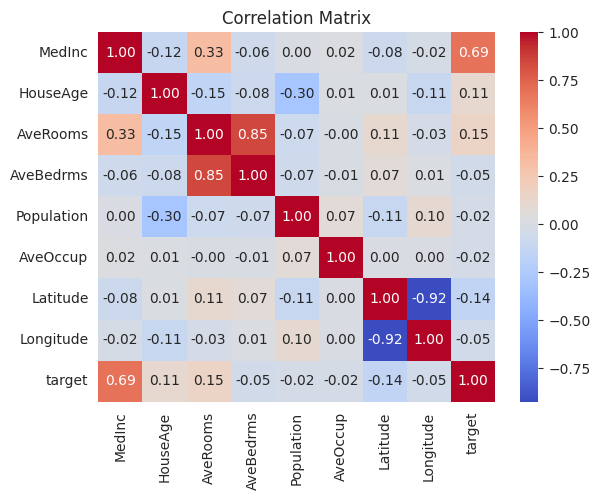

In [5]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
"""
scaler = StandardScaler()
X = scaler.fit_transform(X)
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Models

### Linear Regression

Let first try simple linear regression model with three predictors. Predictors are chosen by the correlation matrix.

$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^2), i = 1,...,n
$


Linear Regression RMSE: 0.8117332473994358
Linear Regression R2: 0.49717158850807075


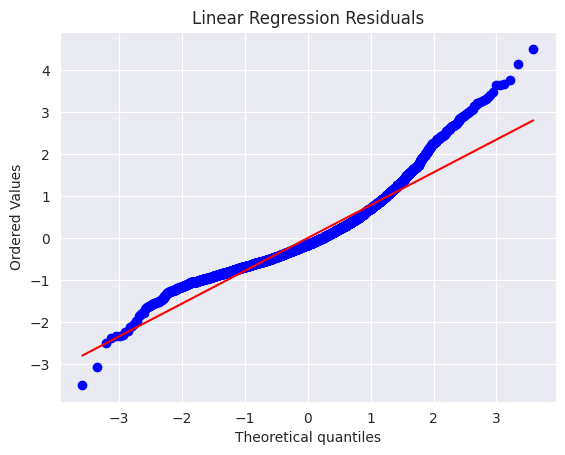

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.iloc[:, 0:3], y_train)

lin_reg_pred = lin_reg.predict(X_test.iloc[:, 0:3])
lin_reg_rmse = root_mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)

print('Linear Regression RMSE:', lin_reg_rmse)
print('Linear Regression R2:', lin_reg_r2)

stats.probplot(y_test-lin_reg_pred, dist='norm', plot=plt)
plt.title('Linear Regression Residuals')
plt.show()

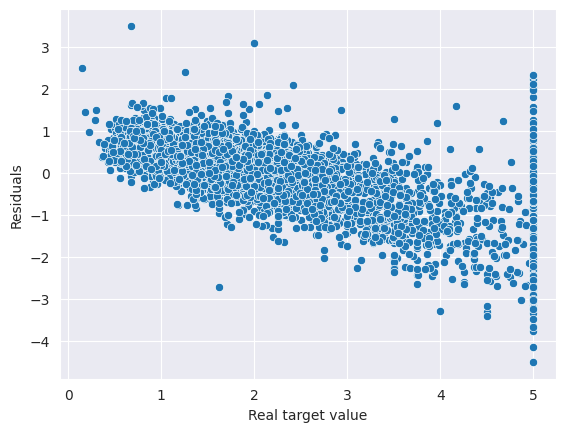

In [8]:
sns.scatterplot(x=y_test, y=(lin_reg_pred - y_test))
plt.xlabel('Real target value')
plt.ylabel('Residuals')
plt.show()

Let now try linear regression model with all predictors.

$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 x_{i5} + \beta_6 x_{i6} + \beta_7 x_{i7} + \beta_8 x_{i8} + \varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^2), i = 1,...,n
$

In [9]:
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_rmse = root_mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)

print('Linear Regression RMSE:', lin_reg_rmse)
print('Linear Regression R2:', lin_reg_r2)

Linear Regression RMSE: 0.7455813830127764
Linear Regression R2: 0.5757877060324508


The negative tail disepeared with adding more parameters for the linear regression model, but the positive tail remained. The reason why the positive tail remaided is the target data distribution.


### Ridge regression

Ridge Regression RMSE: 0.7455222779992702
Ridge Regression R2: 0.5758549611440126


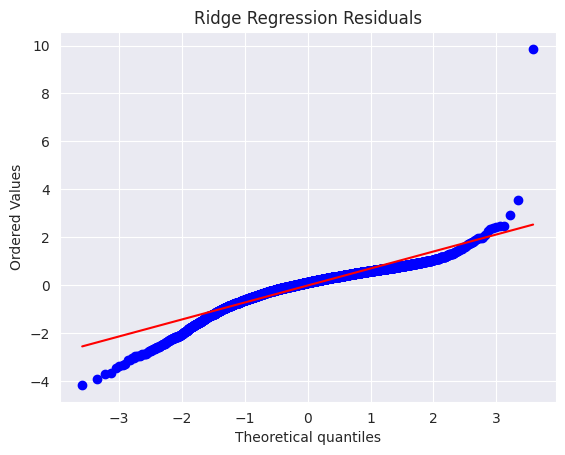

In [10]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_rmse = root_mean_squared_error(y_test, ridge_reg_pred)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)

print('Ridge Regression RMSE:', ridge_reg_rmse)
print('Ridge Regression R2:', ridge_reg_r2)


stats.probplot(ridge_reg_pred-y_test, dist='norm', plot=plt)
plt.title('Ridge Regression Residuals')
plt.show()

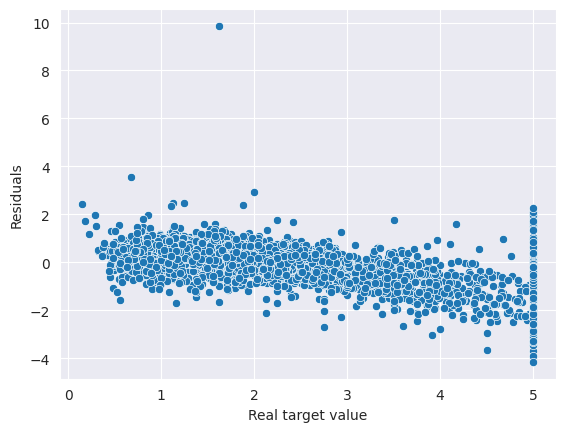

In [11]:
sns.scatterplot(x=y_test, y=(ridge_reg_pred - y_test))
plt.xlabel('Real target value')
plt.ylabel('Residuals')
plt.show()

## Ensemble Models (Round 1)

### Random Forest Model

In [12]:
parameters = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, 10]
}

rf_reg = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_reg, parameters, cv=5, verbose=1, n_jobs=-1, scoring='neg_root_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
rf_predictions = rf_grid_search.predict(X_test)

rf_rmse = root_mean_squared_error(y_test, rf_grid_search.predict(X_test))
rf_r2 = r2_score(y_test, rf_grid_search.predict(X_test))

print(f'Best parameters: {rf_grid_search.best_params_}')
print(f'\nRandom Forest RMSE (Training): {np.abs(rf_grid_search.best_score_)}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R2: {rf_r2}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 10, 'n_estimators': 200}

Random Forest RMSE (Training): 0.5382414647905189
Random Forest RMSE: 0.5422587856389683
Random Forest R2: 0.7756085348275195


### Gradient Boosting Model

In [13]:
parameters = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, 10]
}

grad_reg = GradientBoostingRegressor()
grad_grid_search = GridSearchCV(grad_reg, parameters, cv=5, verbose=1, n_jobs=-1, scoring='neg_root_mean_squared_error')
grad_grid_search.fit(X_train, y_train)
grad_predictions = grad_grid_search.predict(X_test)

grad_rmse = root_mean_squared_error(y_test, grad_predictions)
grad_r2 = r2_score(y_test, grad_predictions)

print(f'Best parameters: {grad_grid_search.best_params_}')
print(f'\nGradient Boosting RMSE (Training): {np.abs(grad_grid_search.best_score_)}')
print(f'Gradient Boosting RMSE (Test): {grad_rmse}')
print(f'Gradient Boosting R2: {grad_r2}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 7, 'n_estimators': 300}

Gradient Boosting RMSE (Training): 0.46697313770711346
Gradient Boosting RMSE (Test): 0.4509449728169979
Gradient Boosting R2: 0.8448183949549071


## Feature Engineering

In [68]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in km

biggest_cities_california = {
    "Los Angeles": {"latitude": 34.052, "longitude": -118.244},
    "San Diego": {"latitude": 32.716, "longitude": -117.165},
    "San Jose": {"latitude": 37.339, "longitude": -121.895},
    "San Francisco": {"latitude": 37.775, "longitude": -122.419},
    "Fresno": {"latitude": 36.748, "longitude": -119.772},
    "Sacramento": {"latitude": 38.582, "longitude": -121.494},
    "Long Beach": {"latitude": 33.767, "longitude": -118.189},
    "Oakland": {"latitude": 37.804, "longitude": -122.271},
    "Bakersfield": {"latitude": 35.373, "longitude": -119.019},
    "Anaheim": {"latitude": 33.835, "longitude": -117.915},
    "Santa Ana": {"latitude": 33.746, "longitude": -117.868},
    "Riverside": {"latitude": 33.953, "longitude": -117.396
    }
}

for city, coord in biggest_cities_california.items():
    df[city] = haversine(df['Latitude'], df['Longitude'], coord['latitude'], coord['longitude'])

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Los Angeles  ...   San Jose  San Francisco      Fresno  \
0    -122.23   4.526   556.531107  ...  67.004302      20.294397  251.176023   
1    -122.22   3.585   554.281742  ...  64.621741      19.871857  249.326056   
2    -122.24   3.521   554.612463  ...  64.439863      17.799127  250.330091   
3    -122.25   3.413   555.195966  ...  64.860099      17.028031  251.101685   
4    -122.25   3.422   555.195966  ...  64.860099      17.028031  251.101685   

   Sacramento  Long Beach   Oakland  Bakersfield     Anaheim   Santa Ana  \
0  101.122670  584.584330  9.185757   399.719744  594.424433  604.826134   
1  102.310761  582.313566  7.670446   397.557981  592.186859  602.584443   
2  104.271313  582.587476  5.794479   398.085500  592.546537  602.933939   
3  104.819564  583.152566  5.437346   398.730187  593.139141  603.523293   
4  104.819564  583.152566  5.437346   398.730187  593.139141  603.523293   

    Riverside  
0  616.399000  
1  614.229643  
2  614.739350  
3  615.378046  
4  615.378046  

[5 rows x 21 columns]

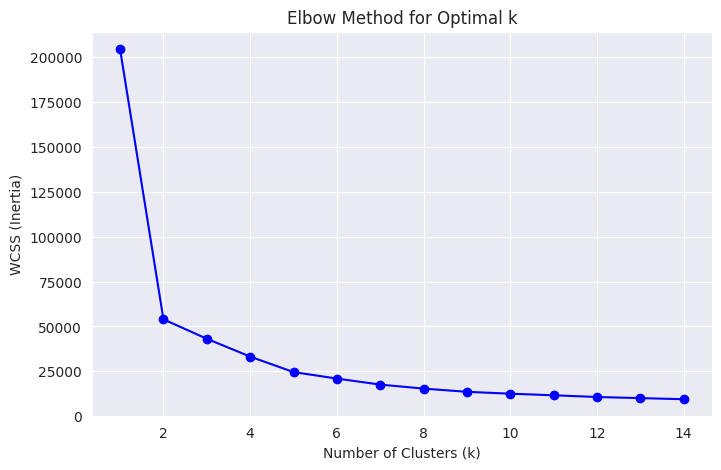

In [69]:
from sklearn.cluster import KMeans

# Extract Latitude & Longitude for clustering
X_price = df[['Latitude', 'Longitude', 'target']]

# Define range of k values
k_values = range(1, 15)  # Try k from 1 to 14
wcss = []  # Store WCSS for each k

# Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_geo)
    wcss.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster centers

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [88]:
kmeans_price = KMeans(n_clusters=4, random_state=42, n_init=10)
df['PriceCluster'] = kmeans_price.fit_predict(X_price)

In [89]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Los Angeles  ...  San Francisco      Fresno  Sacramento  \
0    -122.23   4.526   556.531107  ...      20.294397  251.176023  101.122670   
1    -122.22   3.585   554.281742  ...      19.871857  249.326056  102.310761   
2    -122.24   3.521   554.612463  ...      17.799127  250.330091  104.271313   
3    -122.25   3.413   555.195966  ...      17.028031  251.101685  104.819564   
4    -122.25   3.422   555.195966  ...      17.028031  251.101685  104.819564   

   Long Beach   Oakland  Bakersfield     Anaheim   Santa Ana   Riverside  \
0  584.584330  9.185757   399.719744  594.424433  604.826134  616.399000   
1  582.313566  7.670446   397.557981  592.186859  602.584443  614.229643   
2  582.587476  5.794479   398.085500  592.546537  602.933939  614.739350   
3  583.152566  5.437346   398.730187  593.139141  603.523293  615.378046   
4  583.152566  5.437346   398.730187  593.139141  603.523293  615.378046   

   PriceCluster  
0             2  
1             2  
2             2  
3             2  
4             2  

[5 rows x 22 columns]

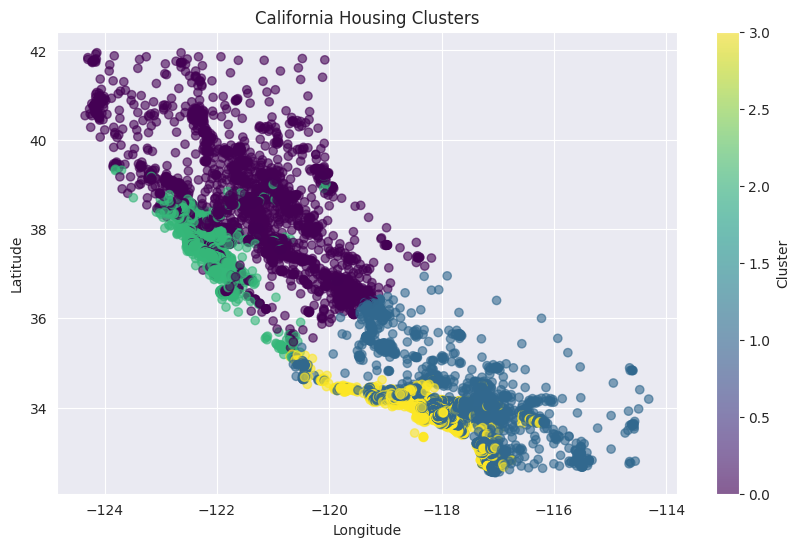

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['PriceCluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Clusters')
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16512, 21) (4128, 21)


## Ensemble Models (Round 2)

I will run now train ensemble models, with feature engineered data. Let's see how the feature engineered data effect models performance.

### Random Forest

In [84]:
parameters = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, 10]
}

rf_reg = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_reg, parameters, cv=5, verbose=1, n_jobs=-1, scoring='neg_root_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
rf_predictions = rf_grid_search.predict(X_test)

rf_rmse = root_mean_squared_error(y_test, rf_grid_search.predict(X_test))
rf_r2 = r2_score(y_test, rf_grid_search.predict(X_test))

print(f'Best parameters: {rf_grid_search.best_params_}')
print(f'\nRandom Forest RMSE (Training): {np.abs(rf_grid_search.best_score_)}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R2: {rf_r2}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 10, 'n_estimators': 200}

Random Forest RMSE (Training): 0.5090643976179895
Random Forest RMSE: 0.5125269414082757
Random Forest R2: 0.7995405480036084


### Gradient Boosting

In [74]:
parameters = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, 10]
}

grad_reg = GradientBoostingRegressor()
grad_grid_search = GridSearchCV(grad_reg, parameters, cv=5, verbose=1, n_jobs=-1, scoring='neg_root_mean_squared_error')
grad_grid_search.fit(X_train, y_train)
grad_predictions = grad_grid_search.predict(X_test)

grad_rmse = root_mean_squared_error(y_test, grad_predictions)
grad_r2 = r2_score(y_test, grad_predictions)

print(f'Best parameters: {grad_grid_search.best_params_}')
print(f'\nGradient Boosting RMSE (Training): {np.abs(grad_grid_search.best_score_)}')
print(f'Gradient Boosting RMSE (Test): {grad_rmse}')
print(f'Gradient Boosting R2: {grad_r2}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 7, 'n_estimators': 300}

Gradient Boosting RMSE (Training): 0.35171012228986437
Gradient Boosting RMSE (Test): 0.3516094006403329
Gradient Boosting R2: 0.9056560412272093


## Neural Network (Round 2)

### MLP Regressor

In [ ]:
parameters = {

}




## Results